In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [5]:
file_path = "accidents.csv"
df = pd.read_csv(file_path, parse_dates=["AccidentDate"])




In [6]:
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AccidentDate      50000 non-null  object
 1   Timing            50000 non-null  object
 2   State             50000 non-null  object
 3   WeatherCondition  50000 non-null  object
 4   RoadCondition     50000 non-null  object
 5   Deaths            50000 non-null  int64 
 6   Reason            50000 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.7+ MB
None


In [7]:
print(df.describe())

             Deaths
count  50000.000000
mean       4.983040
std        3.160581
min        0.000000
25%        2.000000
50%        5.000000
75%        8.000000
max       10.000000


In [8]:
df.head()

,AccidentDate,Timing,State,WeatherCondition,RoadCondition,Deaths,Reason
0,04-02-2013,Morning,Alaska,Rainy,Under Construction,10,Drunk Driving
1,23-02-2005,Night,Arizona,Clear,Under Construction,3,Weather Conditions
2,08-10-2014,Afternoon,California,Clear,Fine,6,Poor Visibility
3,14-01-2015,Night,Colorado,Rainy,Rough,8,Road Conditions
4,17-01-2006,Afternoon,Georgia,Clear,Fine,2,Speeding


In [9]:
df.tail()

,AccidentDate,Timing,State,WeatherCondition,RoadCondition,Deaths,Reason
49995,20-08-2002,Night,Virginia,Clear,Under Construction,2,Mechanical Failure
49996,15-05-2012,Night,Virginia,Clear,Under Construction,0,Mechanical Failure
49997,19-05-2007,Evening,North Carolina,Rainy,Under Construction,2,Driver Fatigue
49998,04-08-2019,Night,South Carolina,Clear,Fine,0,Distracted Driving
49999,25-04-2019,Evening,Georgia,Rainy,Fine,2,Weather Conditions


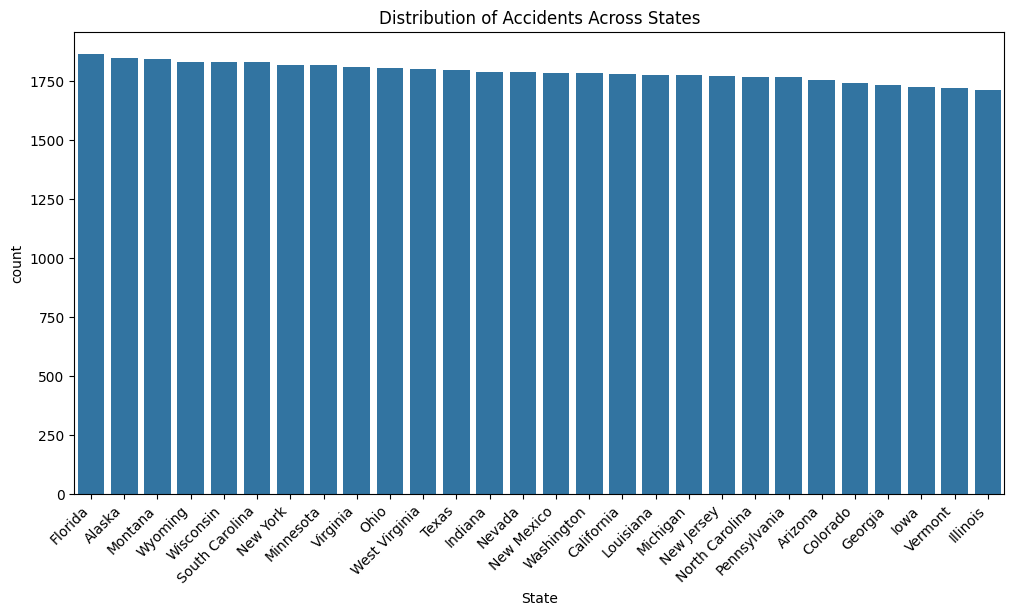

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x="State", data=df, order=df['State'].value_counts().index)
plt.title("Distribution of Accidents Across States")
plt.xticks(rotation=45, ha="right")
plt.show()

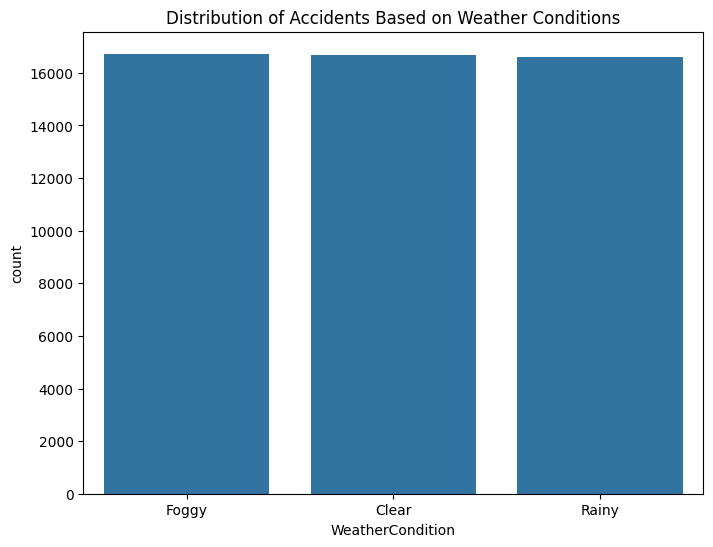

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x="WeatherCondition", data=df, order=df['WeatherCondition'].value_counts().index)
plt.title("Distribution of Accidents Based on Weather Conditions")
plt.show()

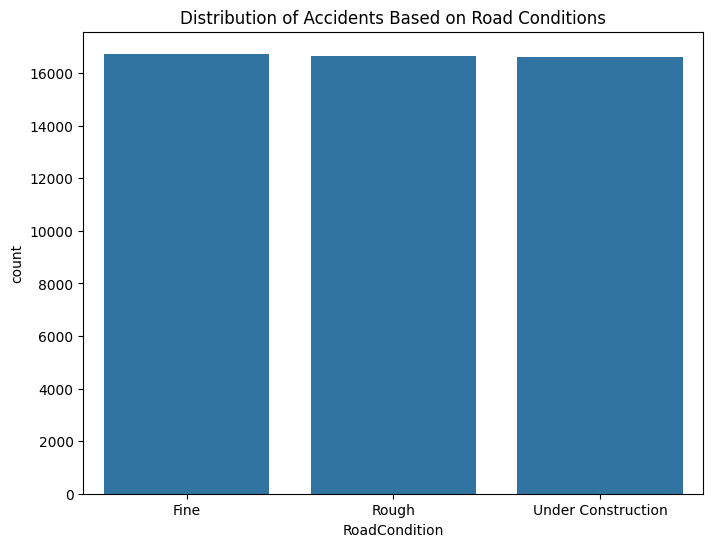

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x="RoadCondition", data=df, order=df['RoadCondition'].value_counts().index)
plt.title("Distribution of Accidents Based on Road Conditions")
plt.show()

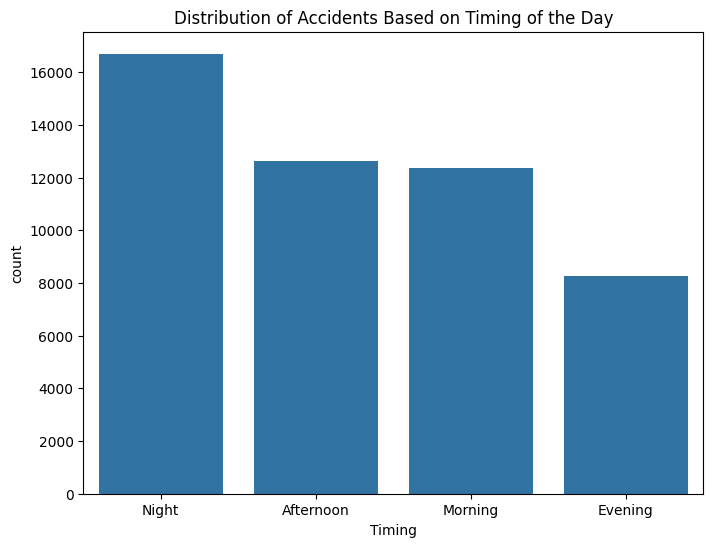

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Timing", data=df, order=df['Timing'].value_counts().index)
plt.title("Distribution of Accidents Based on Timing of the Day")
plt.show()

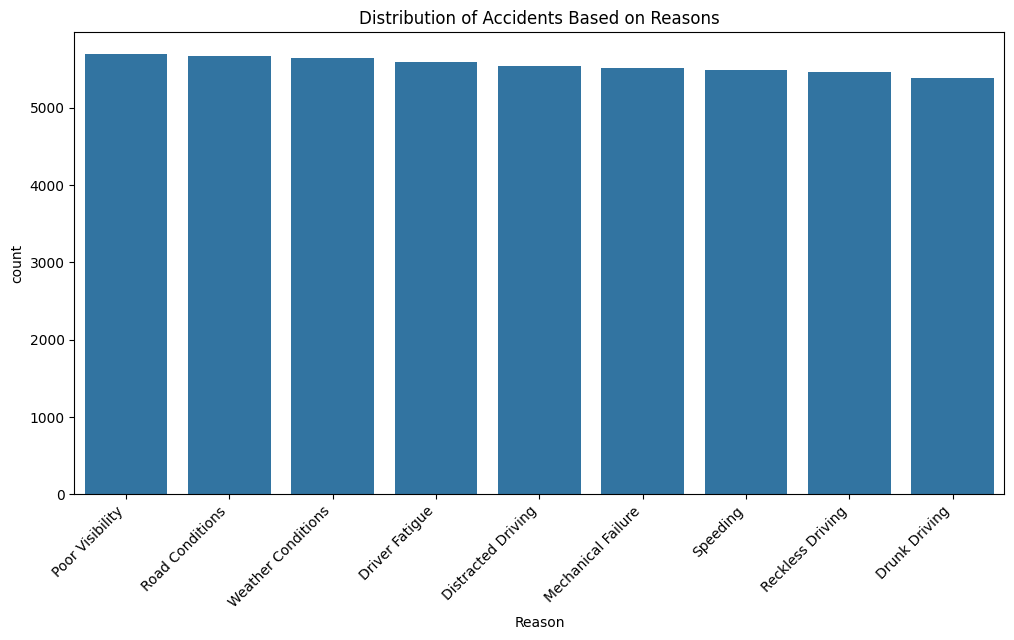

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Reason", data=df, order=df['Reason'].value_counts().index)
plt.title("Distribution of Accidents Based on Reasons")
plt.xticks(rotation=45, ha="right")
plt.show()

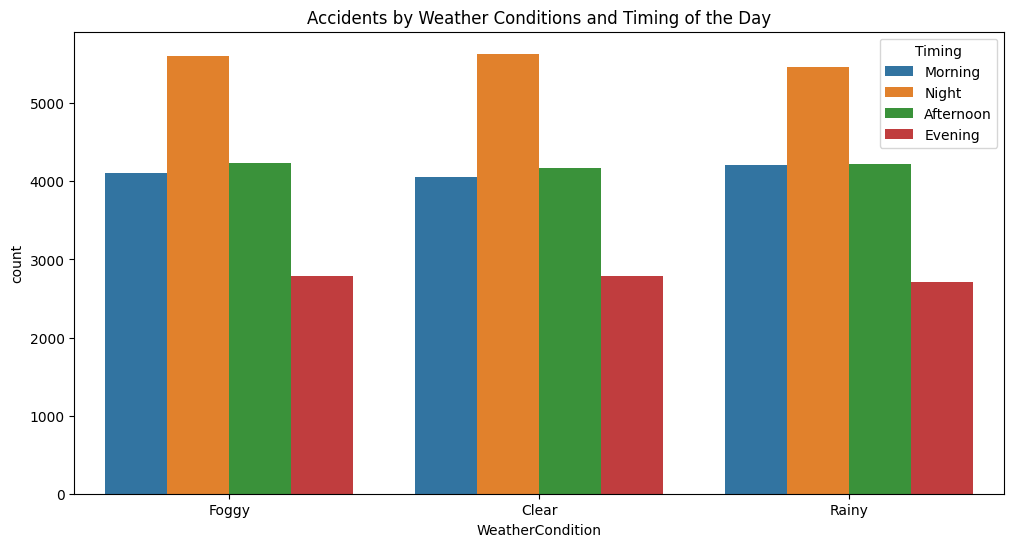

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x="WeatherCondition", hue="Timing", data=accident_data, order=accident_data['WeatherCondition'].value_counts().index)
plt.title("Accidents by Weather Conditions and Timing of the Day")
plt.show()

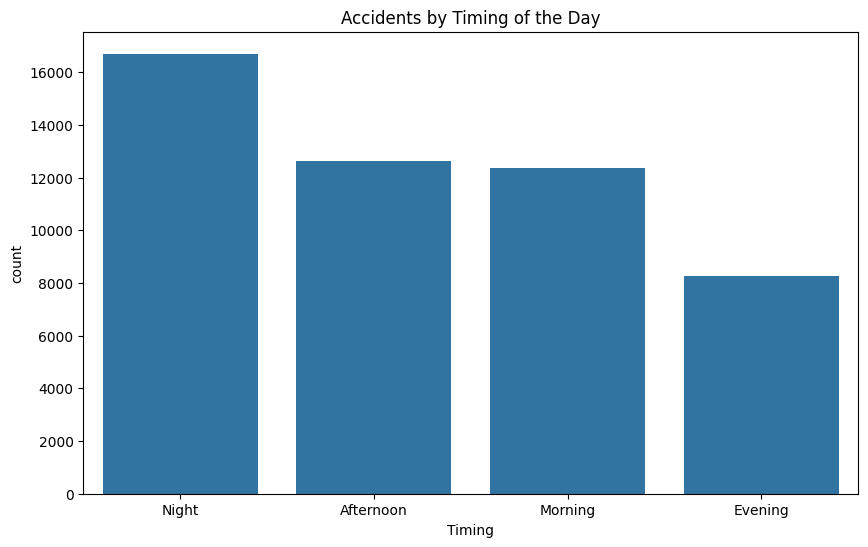

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Timing", data=accident_data, order=accident_data['Timing'].value_counts().index)
plt.title("Accidents by Timing of the Day")
plt.show()

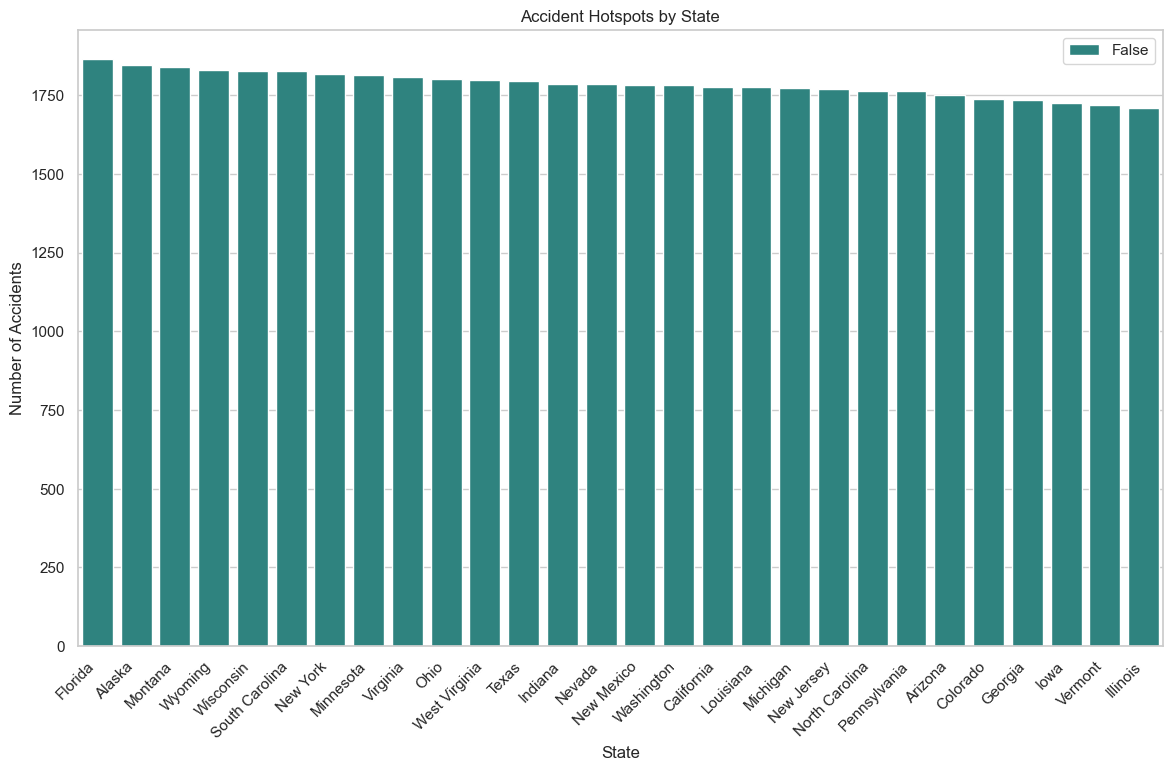

In [24]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
state_accidents = accident_data['State'].value_counts()
sns.barplot(x=state_accidents.index, y=state_accidents.values, palette="viridis",hue=False)
plt.title("Accident Hotspots by State")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()

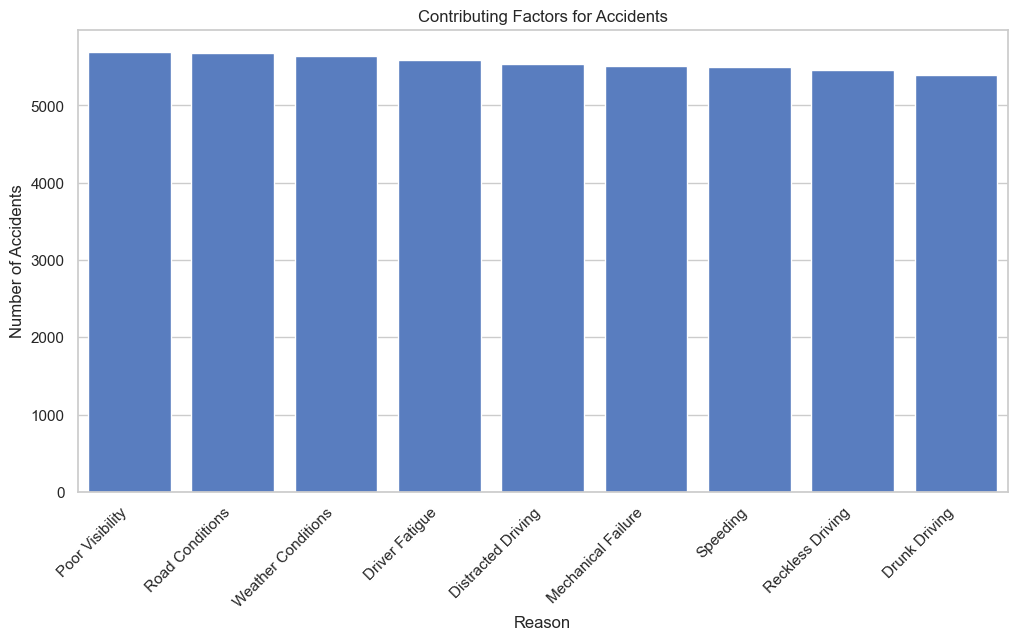

In [32]:
plt.figure(figsize=(12, 6))
reasons_accidents = accident_data['Reason'].value_counts()
sns.barplot(x=reasons_accidents.index, y=reasons_accidents.values,hue= True,palette="muted",legend=False)
plt.title("Contributing Factors for Accidents")
plt.xlabel("Reason")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()

<Figure size 4000x800 with 0 Axes>

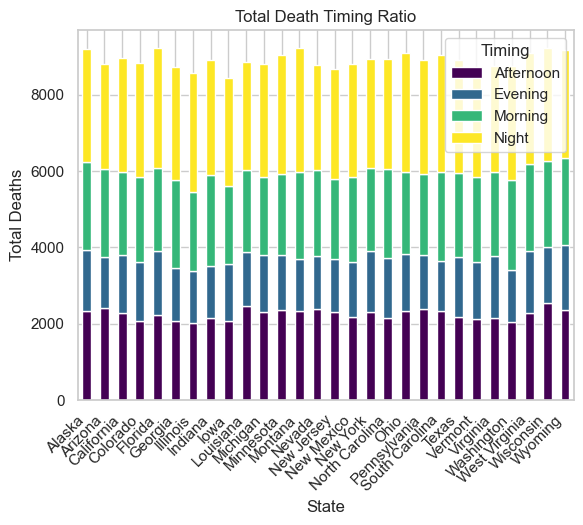

In [26]:

sns.set(style="whitegrid")


state_timing_deaths = accident_data.groupby(['State', 'Timing'])['Deaths'].sum().reset_index()


state_timing_deaths_pivot = state_timing_deaths.pivot(index='State', columns='Timing', values='Deaths').fillna(0)


plt.figure(figsize=(40, 8))
state_timing_deaths_pivot.plot(kind='bar', stacked=True, colormap="viridis")
plt.title("Total Death Timing Ratio")
plt.xlabel("State")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Timing")
plt.show()